In [196]:
# Import the pathlib and csv library
from pathlib import Path
import pandas as pd
import panel as pn
import pygal
import csv
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline
pn.extension()

# Set the file paths

crypto_path = Path("Data/crypto_user_growth_aus.csv")
gym_est_path = Path("Data/gym_establishments.csv")
gym_user_path = Path("Data/gym_users.csv")
total_ops_path = Path("Data/total_operational_savings_edited.csv")
smart_path = Path("Data/smartphone_users.csv")
coin_path = Path("Data/coin_bitcoin.csv")
crypto_user_path = Path("Data/crypto_user_growth_aus.csv")
wallet_user_path = Path ("Data/my-wallet-n-users.csv")

In [13]:
# Reading in the crypto user growth
## Display Crypto user dataframe

crypto_df = pd.read_csv(crypto_path, index_col="year")
crypto_df 

,growth
year,
2019,16.8
2020,18.4
2021,28.8


In [14]:
# Reading in the gym establishments
## Display gym establishments dataframe

gym_est_df = pd.read_csv(gym_est_path, index_col="year")
gym_est_df.head()

,no_of_gyms
year,
2016,3900
2017,4400
2018,4800
2019,5000
2020,5300


In [15]:
# Reading in the gym user
## Display gym user dataframe

gym_user_df = pd.read_csv(gym_user_path, index_col = "age")
gym_user_df = gym_user_df.drop("No", axis=1)
gym_user_df.head()

,number_of_people
age,
15-17,263000
18-24,1103000
25-35,1720000
35-44,1367000
45-54,1151000


In [16]:
# Reading in the total operational savings
## Display total operational savings dataframe

total_ops_df = pd.read_csv(total_ops_path)
total_ops_df.head()

,business,Transaction_Occurence,Price_Old,Total_Cost,Hedera,Total_Cost.1,Savings
0,debitsuccess,100,$1.74,$174,0.00014,0.014,$173.986
1,debitsuccess,1000,$1.74,$$1740,0.00014,0.140,$1739.86
2,debitsuccess,10000,$1.74,$$17400,0.00014,1.140,$17398.6
3,debitsuccess,100000,$1.74,$$174000,0.00014,11.400,$173986
4,payadvantage,100,0.88,88,0.00014,0.014,87.986


In [17]:
# Data cleansing of total_ops_df
## Step 1 = renaming columns, 
### New cleansed dataframe called total_ops

total_ops = total_ops_df.set_axis(["Company","Transactional Occurence","Company Transaction Amnt",
                                  "Total Cost via Company","Hedera Transaction Amnt","Total Cost via Hedera","Savings Hedera vs Company"], axis=1, inplace=False)
total_ops.head()

,Company,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
0,debitsuccess,100,$1.74,$174,0.00014,0.014,$173.986
1,debitsuccess,1000,$1.74,$$1740,0.00014,0.140,$1739.86
2,debitsuccess,10000,$1.74,$$17400,0.00014,1.140,$17398.6
3,debitsuccess,100000,$1.74,$$174000,0.00014,11.400,$173986
4,payadvantage,100,0.88,88,0.00014,0.014,87.986


In [18]:
# Checking datatypes within total_ops dataframe
total_ops.dtypes

Company                       object
Transactional Occurence        int64
Company Transaction Amnt      object
Total Cost via Company        object
Hedera Transaction Amnt      float64
Total Cost via Hedera        float64
Savings Hedera vs Company     object
dtype: object

In [19]:
# Data cleansing of total_ops
## Step 2 renaming indexes i.e. 1 = Payadvantage, 2 = PaySmart etc
### Then indexed Company column
#### New cleansed dataframe called total_ops_2

total_ops_2 = total_ops.replace({1:"PayAdvantage",2:"PaySmart",3:"EzyPay"})
total_ops_2 = total_ops_2.set_index("Company")
total_ops_2.head()

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
debitsuccess,100,$1.74,$174,0.00014,0.014,$173.986
debitsuccess,1000,$1.74,$$1740,0.00014,0.140,$1739.86
debitsuccess,10000,$1.74,$$17400,0.00014,1.140,$17398.6
debitsuccess,100000,$1.74,$$174000,0.00014,11.400,$173986
payadvantage,100,0.88,88,0.00014,0.014,87.986


In [20]:
# Looking at total_ops_2 statistics

total_ops_2.describe()

,Transactional Occurence,Hedera Transaction Amnt,Total Cost via Hedera
count,16.000000,1.600000e+01,16.000000
mean,27775.000000,1.400000e-04,3.206000
std,43251.843891,2.799398e-20,4.912456
min,100.000000,1.400000e-04,0.014000
25%,775.000000,1.400000e-04,0.108500
50%,5500.000000,1.400000e-04,0.640000
75%,32500.000000,1.400000e-04,3.900000
max,100000.000000,1.400000e-04,11.400000


In [21]:
# Reading in the total smartphone users
## Display smartphone users dataframe

smart_df = pd.read_csv(smart_path, index_col="year")
smart_df = smart_df.drop("Unnamed: 2", axis=1)
smart_df.head()

,no_of_users
year,
2017,18600000
2018,19600000
2019,20000000
2020,20500000
2021,20600000


In [22]:
# Create_bar_chart function to plot (bar) dataframes

def create_bar_chart(data, title,xlabel,ylabel,color):

    create_bar_chart = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=500)
    
    return(create_bar_chart)

In [23]:
# Bar chart for crypto dataframe

crypto_bar_chart = create_bar_chart(crypto_df,"Cryptocurrency User Growth (in Years)", "Year", "In Millions ($)", "Orange")
crypto_bar_chart

:Bars   [year]   ( growth)

In [40]:
# Bar chart for gym establishments dataframe

gym_est_chart = create_bar_chart(gym_est_df,"Number of Gym Establishments (in Years)","Year","Number of gyms","Royalblue")
gym_est_chart

:Bars   [year]   (no_of_gyms)

In [358]:
# Pygal Chart for gym establishments dataframe

gym_est_chart_pygal = pygal.Bar()
gym_est_chart_pygal.add('Gyms Open', [3900, 4400,4800,5000,5300])
gym_est_chart_pygal.x_labels = (2016,2017,2018,2019,2020)
gym_est_chart_pygal.render_to_file('gym_est_chart_pygal.svg')

In [359]:
# Bar chart for gym users dataframe

gym_user_chart = create_bar_chart(gym_user_df,"Number of Gym Users (2021)","Age Group","Number of people","green").opts(yformatter="%.0f")
gym_user_chart

:Bars   [age]   (number_of_people)

In [360]:
# Bar chart smartphone users

smart_users_chart =  create_bar_chart(smart_df,"Number of people using smartphones","Years","Number of people","hotpink").opts(yformatter="%.0f")
smart_users_chart

:Bars   [year]   (no_of_users)

In [361]:
# Creating transactional savings dataframe comparison for 100 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100

total_ops_100 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100]
total_ops_100 = total_ops_100[["Savings Hedera vs Company"]]
total_ops_100

,Savings Hedera vs Company
Company,
debitsuccess,$173.986
payadvantage,87.986
paysmart,50.986
ezypay,43.986


In [362]:
total_ops_2

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
debitsuccess,100,$1.74,$174,0.00014,0.014,$173.986
debitsuccess,1000,$1.74,$$1740,0.00014,0.140,$1739.86
debitsuccess,10000,$1.74,$$17400,0.00014,1.140,$17398.6
debitsuccess,100000,$1.74,$$174000,0.00014,11.400,$173986
payadvantage,100,0.88,88,0.00014,0.014,87.986
payadvantage,1000,0.88,888,0.00014,0.140,879.86
payadvantage,10000,0.88,8888,0.00014,1.140,8798.6
payadvantage,100000,0.88,88888,0.00014,11.400,87986
paysmart,100,0.51,51,0.00014,0.014,50.986


In [363]:
# Creating plot

# total_ops_100.plot(kind="bar",title="Company Comparison",colormap="Accent",figsize=(20,10))

In [364]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_1000

total_ops_1000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 1000]
total_ops_1000 

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
debitsuccess,1000,$1.74,$$1740,0.00014,0.14,$1739.86
payadvantage,1000,0.88,888,0.00014,0.14,879.86
paysmart,1000,0.51,510,0.00014,0.14,509.86
ezypay,1000,0.44,440,0.00014,0.14,439.86


In [365]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_10000

total_ops_10000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 10000]
total_ops_10000 

,Transactional Occurence,Company Transaction Amnt,Total Cost via Company,Hedera Transaction Amnt,Total Cost via Hedera,Savings Hedera vs Company
Company,,,,,,
debitsuccess,10000,$1.74,$$17400,0.00014,1.14,$17398.6
payadvantage,10000,0.88,8888,0.00014,1.14,8798.6
paysmart,10000,0.51,5100,0.00014,1.40,5098.6
ezypay,10000,0.44,4400,0.00014,1.40,4398.6


In [ ]:
# Creating transactional savings dataframe comparison for 1000 transactional occurence
## Data source = total_ops_2
### New dataframe called total_ops_100000

total_ops_100000 = total_ops_2.loc[total_ops_2["Transactional Occurence"] == 100000]
total_ops_100000 

In [346]:
## Create functions for the Dashboard

In [366]:
pygal_svg = pn.pane.SVG('gym_est_chart_pygal.svg', width=800, height=600)

In [372]:
gympay_pane = pn.pane.PNG('Gympay.png', width=600)

In [368]:
# Create pn.rows and pn.columns for Dashboard

column = pn.Column(
    ('# Welcome to GymPay.'),
    gympay_pane,
    ('On this project Group B decided to gather research on blockchain technology and its market potential to change the financial payment services industry, with example given for the Fitness Industry.'),
    ('This Dashboard includes a range of plots to show you the business potential of a blockchain geared product in the Fitness world.'),
    ('Click the Tabs above to shift through each plot and analysis.'),
)

column_pygal_gyms = pn.Column(
    ('# Gym Establishments Over Time'),
    ("hello"),
    svg_pane
)

In [370]:
# Create Dashboard Tabs
dashboard = tabs = pn.Tabs(
        ## hello
    ("Welcome", column),
    ('Gym Estabhlishment Growth', svg_pane)
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] PNG(str, width=600)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Markdown(str)
    [1] SVG(str, height=600, sizing_mode='fixed', width=800)
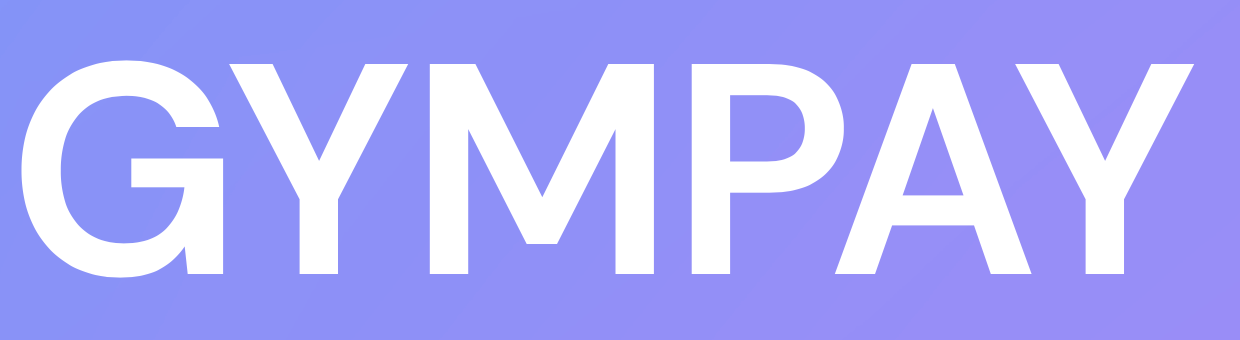

In [371]:
dashboard.servable()